In [ ]:
!pip install pandas


In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
#for building the model
from sklearn.model_selection import train_test_split
# for preprocessing libries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
Data = pd.read_csv("./Medical_insurance_dataset (1).csv")

In [ ]:
Data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
...,...,...,...,...,...
395,15691863,Female,46,41000,purchased
396,15706071,Male,51,23000,purchased
397,15654296,Female,50,20000,purchased
398,15755018,Male,36,33000,not-purchased


In [ ]:
Data["Gender"]

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [ ]:
Data.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X = Data[['User ID', 'Age', 'EstimatedSalary']]
X['Gender'] = encoder.fit_transform(Data['Gender'])

y = encoder.fit_transform(Data["Purchased"])
X

<ipython-input-65-5ef1a864d8e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = encoder.fit_transform(Data['Gender'])


,User ID,Age,EstimatedSalary,Gender
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (160, 4), (240,), (160,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [77]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

y_predict_decision = decision_model.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_predict_decision)
accuracy

0.8625

In [84]:
print(metrics.classification_report(y_test, y_predict_decision))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       100
           1       0.83      0.80      0.81        60

    accuracy                           0.86       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.86      0.86      0.86       160



In [85]:
random_model = RandomForestClassifier()

random_model.fit(X_train, y_train)

y_predict_random = random_model.predict(X_test)

In [95]:
random_acc = accuracy_score(y_test, y_predict_random)
print (random_acc)

0.90625


 **using  KNeighborsClassifier()**

In [96]:
kn_model = KNeighborsClassifier()

kn_model.fit(X_train, y_train)

y_predict_kn = kn_model.predict(X_test)

In [97]:
kn_acc = accuracy_score(y_test, y_predict_kn)
print(kn_acc)

0.875


EDA // EXPLOTARY DATA ANALYSIS

In [98]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

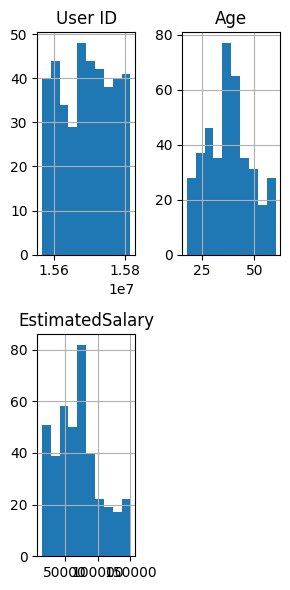

In [99]:
#HISTOGRAM
Data.hist(figsize = (3,6))
plt.tight_layout()
plt.show()

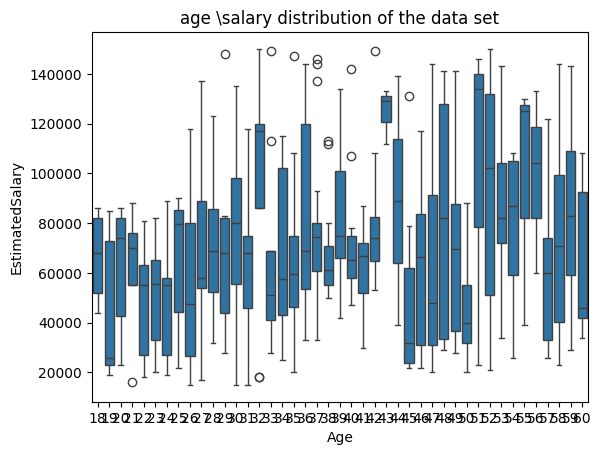

In [102]:
sns.boxplot( x = 'Age', y = 'EstimatedSalary', data = Data)
plt.title("age \salary distribution of the data set")
plt.show()